# Homework 7 
## Maryam Asghari

Use the enclosed file “simulatedSocialMedia.csv”. This file is a simulation of a graph dataset and each row presents two nodes that are connected to each other.

In [1]:
import pandas as pd 
import numpy as np
hw = pd.read_csv("person_knows_person.csv")

In [2]:
hw

Person.id|Person.id
0                  38|956
1                  38|962
2                  38|941
3                   38|74
4                   38|36
...                   ...
29785             438|100
29786             438|404
29787             438|415
29788             438|545
29789              438|62

[29790 rows x 1 columns]

### Getting pairs and Nodes

In [3]:
edges = [text.split("|") for text in hw['Person.id|Person.id']]
pairs = [(int(edge[0]),int(edge[1])) for edge in edges]
hw['edges'] = pairs
nodes = [int(pair[0]) for pair in hw['edges']]
hw['nodes'] = nodes

In [4]:
#get first 25 rows
hw.head(10)


Person.id|Person.id      edges  nodes
0              38|956  (38, 956)     38
1              38|962  (38, 962)     38
2              38|941  (38, 941)     38
3               38|74   (38, 74)     38
4               38|36   (38, 36)     38
5               38|53   (38, 53)     38
6               38|48   (38, 48)     38
7               38|29   (38, 29)     38
8               38|46   (38, 46)     38
9               38|40   (38, 40)     38

In [5]:
hw.nunique(axis=0)


Person.id|Person.id    29790
edges                  29790
nodes                    998
dtype: int64

In [7]:
# Used to check the nodes 
x = np.array(nodes)
uni_node = np.unique(x)
#uni_node# 0 to 999

## Plotting the graph 

998
14895


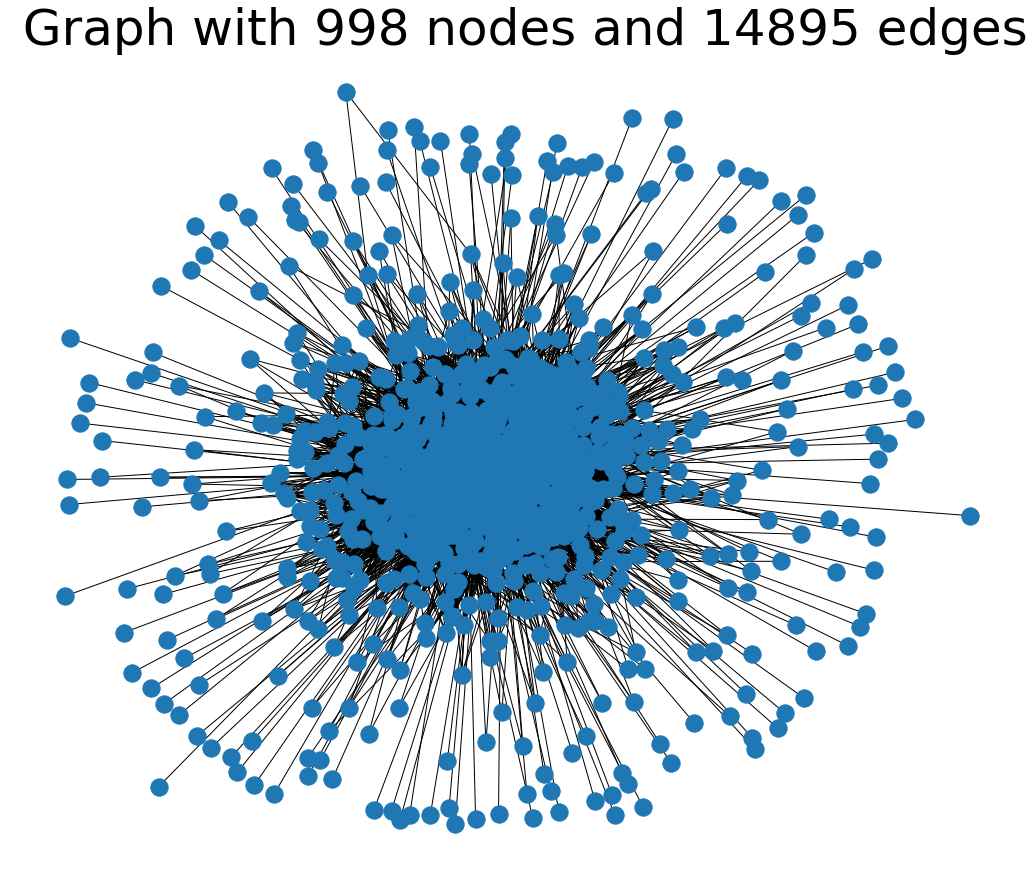

In [97]:
import networkx as nx
import networkx.algorithms.tree as tree
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(hw['nodes'])
# add edge to the graph
G.add_edges_from(pairs)
print(G.number_of_nodes())
print(G.number_of_edges())
plt.figure(figsize=(18,15))
plt.title(" Graph with 998 nodes and 14895 edges", fontdict = {'fontsize' : 50})
nx.draw(G)

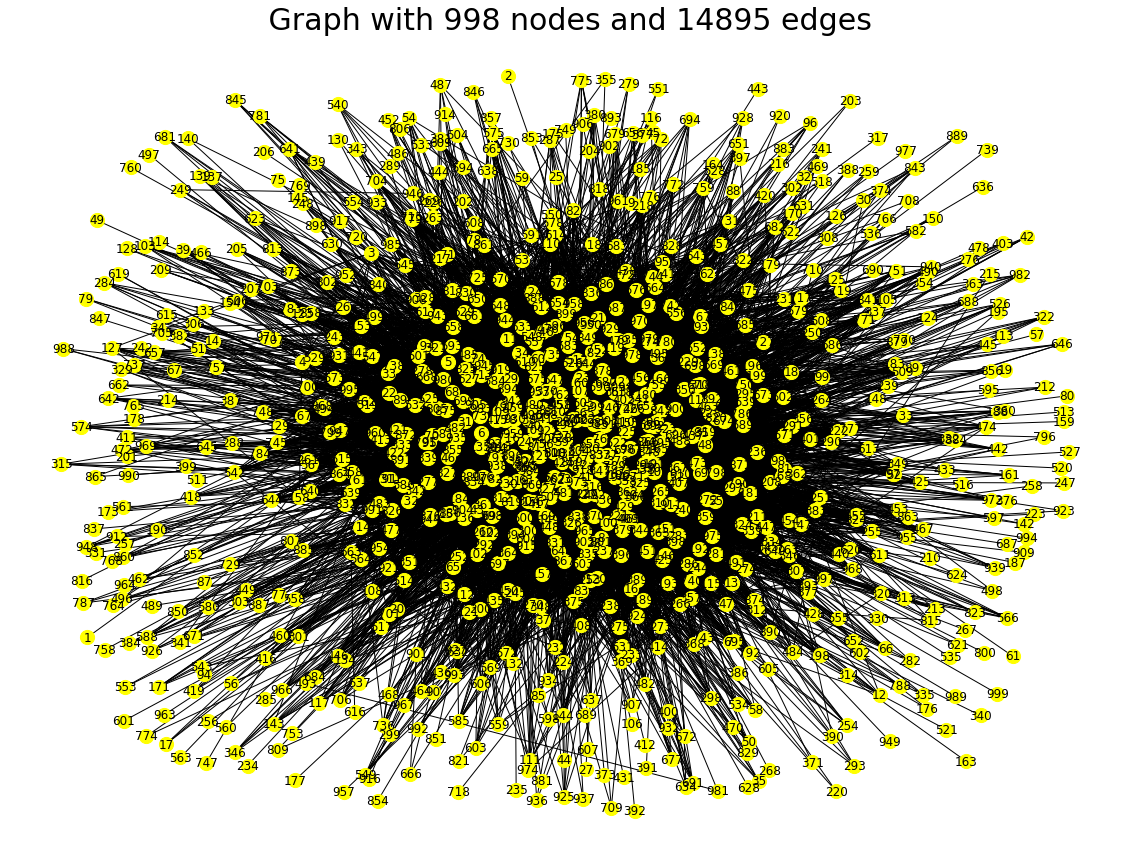

In [103]:
plt.figure(figsize=(20,15))
pos=nx.spring_layout(G,k=0.2, iterations=10)
plt.title(" Graph with 998 nodes and 14895 edges", fontdict = {'fontsize' : 30})
nx.draw(G,pos ,with_labels = True, node_color='yellow',node_size=200)


## Dijkstra

Dijkstra to find the shortest path in the graph. Since the graph is large you can create a smaller file and work on the smaller graph. (1 point)

The assignment does not mentioned path between which nodes. I will try a few approches:

In [15]:
# between to Node: 
print(nx.dijkstra_path(G,9,616)) 
print(nx.dijkstra_path(G,9,49))

[9, 971, 225, 663, 616]
[9, 971, 225, 783, 49]


In [152]:
#we can also get the edges 
shortestpath = nx.dijkstra_path(G,9,616)
sp = []
for i in range(0,len(shortestpath)-1):
    sp.append((shortestpath[i],shortestpath[i+1]))
sp

[(9, 971), (971, 225), (225, 663), (663, 616)]

In [16]:
#finding the shortest path between first 10 node using dijkstra_path

from itertools import combinations

nodelist = list(range(0, 10))
paths = {}
for nodes in combinations(nodelist, r=2):
    paths[nodes] = nx.dijkstra_path(G, *nodes)

print(paths)

{(0, 1): [0, 980, 1], (0, 2): [0, 992, 296, 2], (0, 3): [0, 319, 3], (0, 4): [0, 980, 4], (0, 5): [0, 227, 5], (0, 6): [0, 319, 6], (0, 7): [0, 227, 7], (0, 8): [0, 262, 8], (0, 9): [0, 225, 971, 9], (1, 2): [1, 980, 227, 296, 2], (1, 3): [1, 980, 4, 3], (1, 4): [1, 980, 4], (1, 5): [1, 980, 733, 5], (1, 6): [1, 980, 4, 6], (1, 7): [1, 980, 227, 7], (1, 8): [1, 980, 959, 8], (1, 9): [1, 980, 557, 225, 971, 9], (2, 3): [2, 296, 353, 3], (2, 4): [2, 296, 427, 512, 4], (2, 5): [2, 296, 180, 5], (2, 6): [2, 296, 750, 6], (2, 7): [2, 296, 353, 7], (2, 8): [2, 296, 896, 8], (2, 9): [2, 296, 225, 971, 9], (3, 4): [3, 4], (3, 5): [3, 5], (3, 6): [3, 6], (3, 7): [3, 941, 7], (3, 8): [3, 70, 8], (3, 9): [3, 941, 510, 971, 9], (4, 5): [4, 5], (4, 6): [4, 6], (4, 7): [4, 941, 7], (4, 8): [4, 70, 8], (4, 9): [4, 941, 510, 971, 9], (5, 6): [5, 6], (5, 7): [5, 227, 7], (5, 8): [5, 875, 8], (5, 9): [5, 875, 8, 971, 9], (6, 7): [6, 965, 7], (6, 8): [6, 919, 8], (6, 9): [6, 514, 500, 971, 9], (7, 8): [7

In [24]:
# Keys with shortest length lists in this dictionary
Shortest = min([len(paths[path]) for path in paths])
res = []
for path in paths:
    if len(paths[path]) == Shortest:
        res.append(path)
          
print("Nodes with shortest path among first 10 Nodes using Dijkstra shortest paths : " + str(res) + " with lenght : " + str(len(paths[res[0]])-1) )

Nodes with shortest path among first 10 Nodes using Dijkstra shortest paths : [(3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)] with lenght : 1


In [27]:
import random
source , target = random.randint(0, 999),random.randint(0, 999)
path = nx.dijkstra_path(G,source , target)
print("Shortest path {} and {}: ".format(source , target) + str(path) + " with lenght = " + str(len(path)-1) )


Shortest path 500 and 335: [500, 825, 510, 335] with lenght = 3


Prim and Kruskal to find the MST from two arbitrary nodes one will be source one node will be target (2 points).

## Prim

In [29]:
# Prim Algorithm
mst = tree.minimum_spanning_edges(G, algorithm='prim',
data=False)
edgelist = list(mst)
#sorted(edgelist)

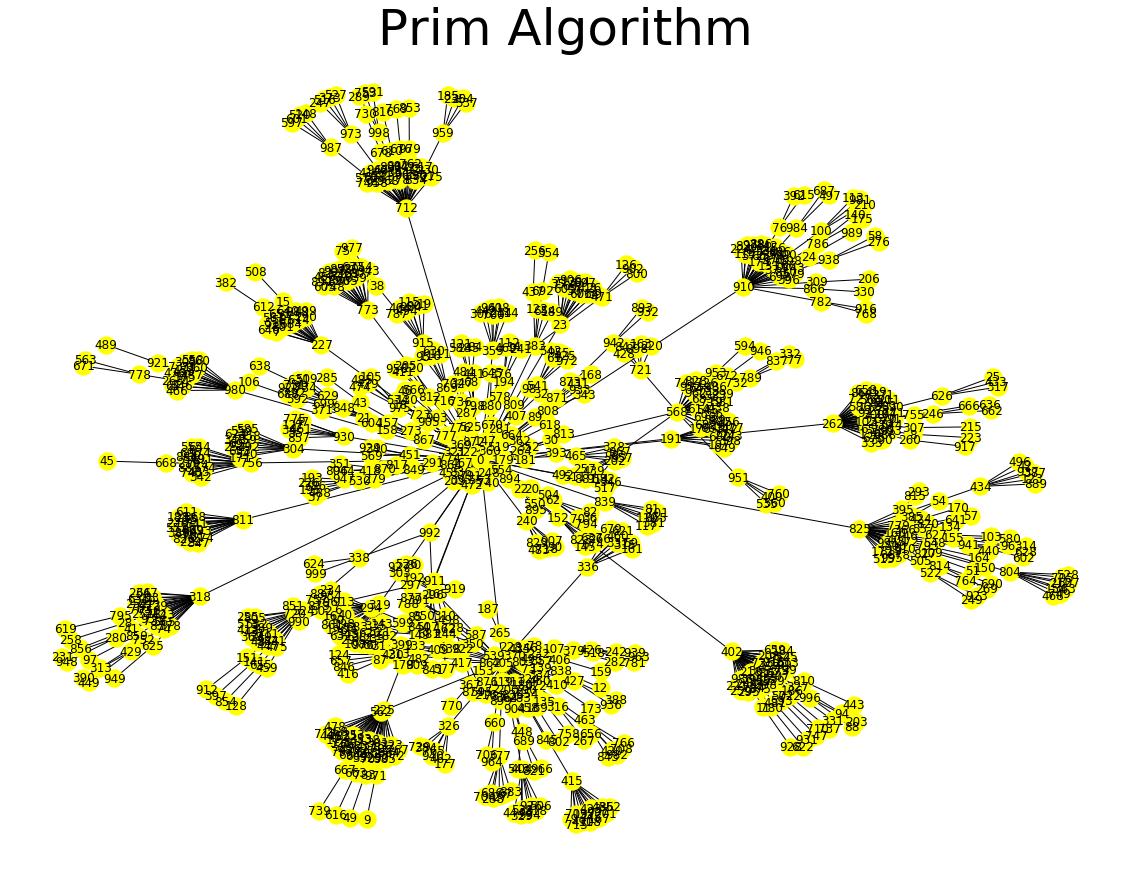

In [42]:
plt.figure(figsize=(20,15))
G2 = nx.Graph()
G2.add_edges_from(edgelist)
plt.title("Prim Algorithm", fontdict = {'fontsize' : 50})
nx.draw(G2, with_labels = True, node_color='yellow')

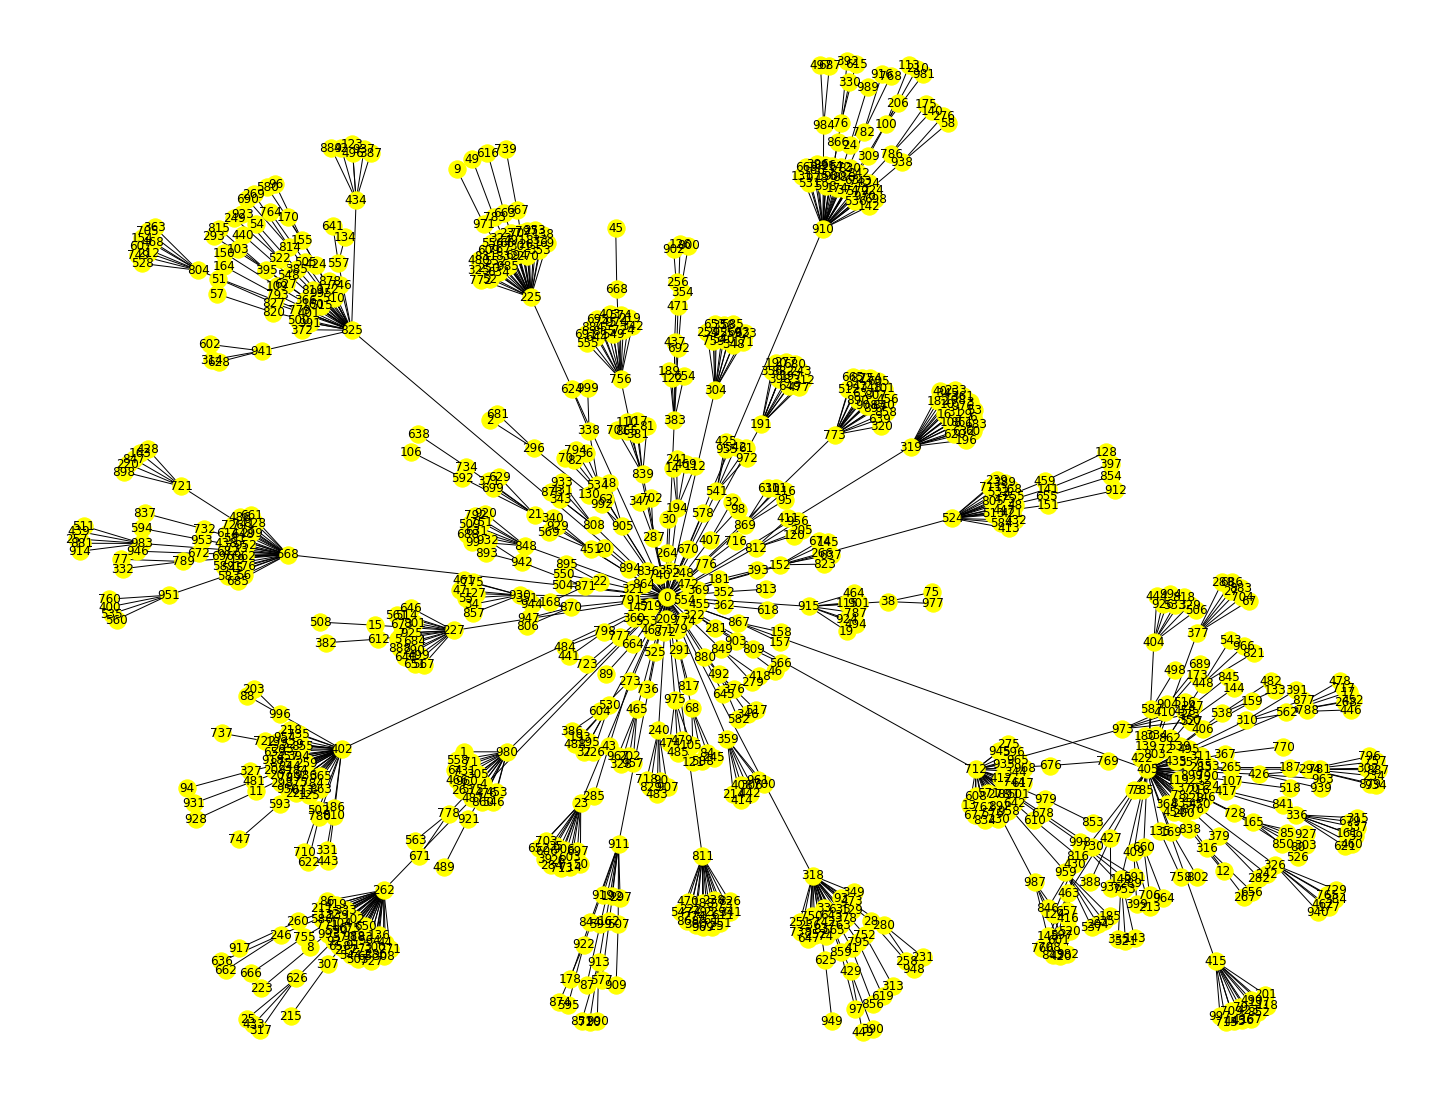

In [177]:
plt.figure(figsize=(20,15))
G2 = nx.Graph()
G2.add_edges_from(edgelist)
#plt.title("Prim Algorithm")
nx.draw(G2, with_labels = True, node_color='yellow')

## kruskal

In [178]:
# Kruskal Algorithm
mst = tree.minimum_spanning_edges(G, algorithm="kruskal",data=False)
edgelist = list(mst)
#sorted(edgelist)


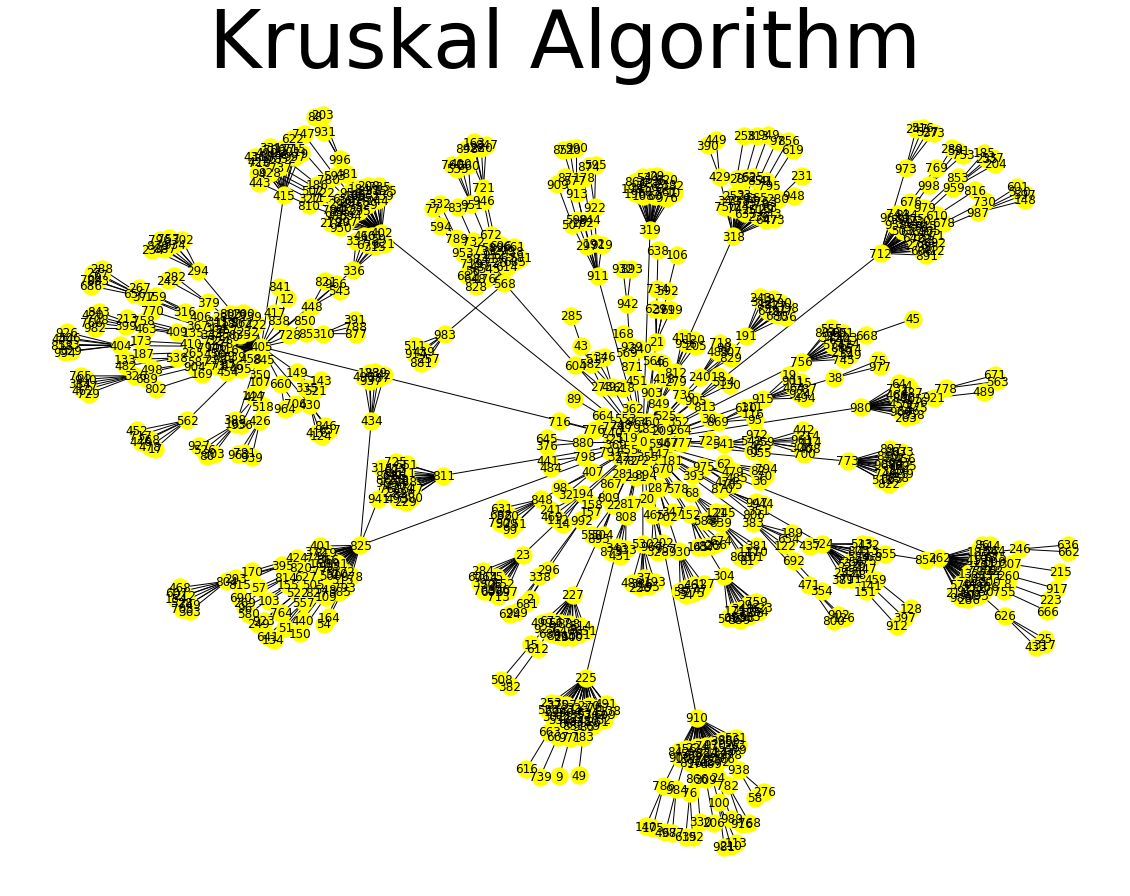

In [41]:
plt.figure(figsize=(20,15))
G2 = nx.Graph()
G2.add_edges_from(edgelist)
plt.title("Kruskal Algorithm", fontdict = {'fontsize' : 60})
nx.draw(G2, with_labels = True, node_color='yellow')

## Page rank and HITS algorithm

Page rank and HITS algorithm to order the graph nodes based on their importance. Again, if the graph is too large for your system you can made a smaller file and use a subgraph. (4 points)

Text(0.5, 1.0, 'Directed Graph')

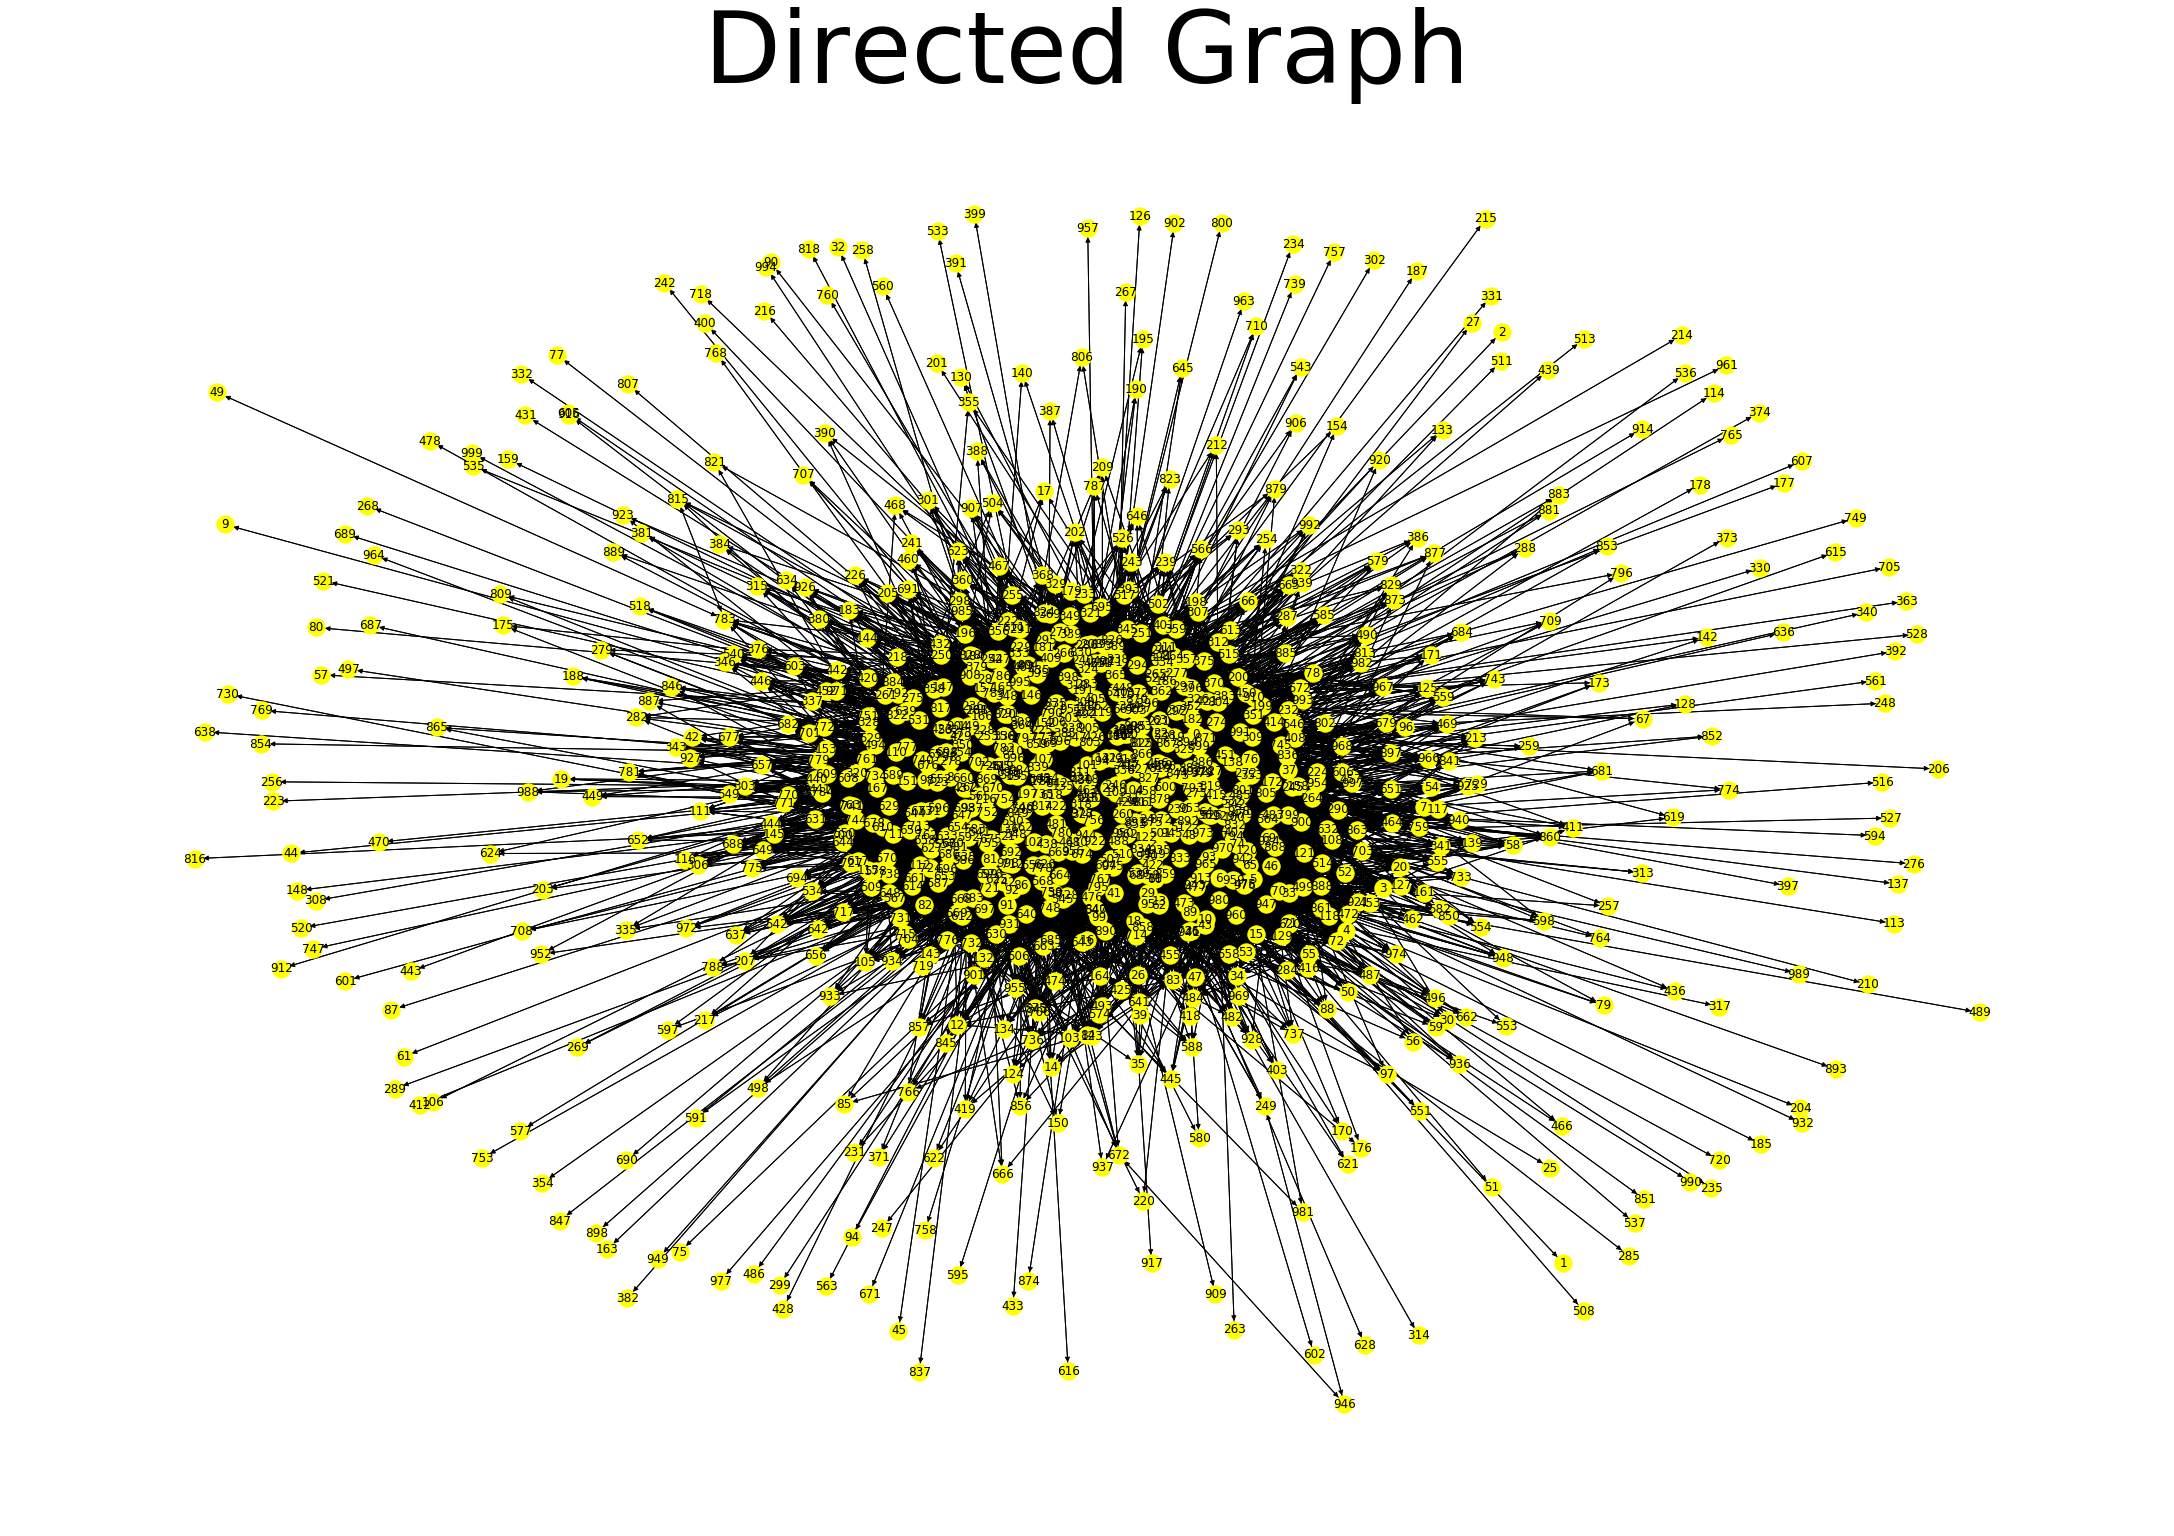

In [39]:
plt.figure(figsize=(30,20))
H = nx.DiGraph()
H.add_edges_from(pairs)
nx.draw(H, with_labels = True, node_color='yellow')
plt.title("Directed Graph", fontdict = {'fontsize' : 100})

In [32]:
plt.figure(figsize=(20,15))
H = nx.DiGraph()
H.add_edges_from(pairs)

pr = nx.pagerank(H, alpha=0.4)
pr

import operator

sorted_pr = dict( sorted(pr.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_pr)



Dictionary in descending order by value :  {959: 0.003525074560318856, 804: 0.003304224026090037, 973: 0.0030729610867317914, 471: 0.0030287925256273322, 983: 0.002900593731933182, 721: 0.0028684368184805215, 987: 0.002686761649887033, 404: 0.0026121802556611437, 938: 0.002570243540743837, 294: 0.0025493467674486798, 415: 0.0025365546478004386, 76: 0.0024854775678707255, 38: 0.002475193766078028, 951: 0.002447882821780576, 100: 0.002434585490944123, 913: 0.0024149478925742742, 434: 0.0024091870040196966, 568: 0.0024061458709764244, 326: 0.00240050804423402, 922: 0.002391678254595629, 0: 0.002359152005170603, 782: 0.0023393275125343613, 789: 0.002333015299887161, 941: 0.0023251165179053526, 296: 0.0023232399038256965, 40: 0.002301360331667367, 942: 0.0022923231870054924, 910: 0.0022651482365950468, 327: 0.0022595724946648382, 377: 0.0022553583900138197, 562: 0.0022539127316179015, 655: 0.0022088781276058235, 262: 0.002200730931730911, 246: 0.002198669925470586, 811: 0.002189550279759810

<Figure size 1440x1080 with 0 Axes>

In [36]:
#top 10 with highest ranks
list(sorted_pr.items())[:10]

[(959, 0.003525074560318856),
 (804, 0.003304224026090037),
 (973, 0.0030729610867317914),
 (471, 0.0030287925256273322),
 (983, 0.002900593731933182),
 (721, 0.0028684368184805215),
 (987, 0.002686761649887033),
 (404, 0.0026121802556611437),
 (938, 0.002570243540743837),
 (294, 0.0025493467674486798)]

In [46]:
hits = nx.hits(H, max_iter = 50, normalized = True) 
h,a = hits
print('authority score \n')
print(a)
print('hub score \n')
print(h)

authority score 

{38: 0.0019452257130624742, 956: 0.001297562212443843, 962: 0.0021993553775730883, 941: 0.0017645735745522282, 74: 0.001362898050809995, 36: 0.0011273428023276684, 53: 0.0005725682882058708, 48: 0.001515089448049213, 29: 0.001580840167318034, 46: 0.0014481955635178587, 40: 0.0022793065262194, 60: 0.0016680034959628376, 31: 0.00239658663291884, 41: 0.0016193454414941237, 6: 0.0013881839731671088, 4: 0.0005949331860618026, 547: 0.0012127747855692613, 832: 0.0012562521168983302, 129: 0.0006862367082341011, 915: 0.0016103834140402651, 921: 0.0008397165750814672, 507: 0.0021411963712074764, 501: 0.00143305367849437, 839: 0.002138277919363865, 99: 0.0008089049809114777, 452: 0.0002970495046878743, 457: 0.0006552152238723505, 453: 0.00031397691027190716, 131: 0.0024626246671816585, 462: 0.00018496045238408423, 416: 0.0003338521540606111, 414: 0.0008945278101826547, 417: 0.002351717919555686, 415: 0.0021486434607580767, 109: 0.0027431136273560843, 119: 0.002184005502347826, 7

In [48]:
print('Top 10 authority score \n')
sorted_a = dict( sorted(a.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_a.items())[:10]


Top 10 authority score 



[(366, 0.0033577279029500043),
 (316, 0.003331769105994931),
 (811, 0.0033095727389108407),
 (385, 0.0032950872178370717),
 (107, 0.0032214384986426637),
 (819, 0.003203131261191799),
 (918, 0.003179864675354254),
 (402, 0.0031652177980596293),
 (240, 0.0031622636114188637),
 (165, 0.003160300099788456)]

In [49]:
print('Top 10 hub score \n')
sorted_h = dict( sorted(h.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_h.items())[:10]

Top 10 hub score 



[(366, 0.0033577279029841887),
 (316, 0.0033317691060106526),
 (811, 0.003309572738948672),
 (385, 0.0032950872178764924),
 (107, 0.0032214384986767645),
 (819, 0.003203131261233388),
 (918, 0.0031798646753872497),
 (402, 0.0031652177980925353),
 (240, 0.0031622636114456665),
 (165, 0.0031603000998156145)]

## louvain

In [117]:
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# retrun partition as a dict
partition = community_louvain.best_partition(G)
print(partition)

{38: 0, 534: 1, 941: 1, 347: 0, 303: 0, 977: 0, 495: 2, 75: 0, 884: 0, 540: 0, 336: 2, 405: 0, 688: 1, 135: 0, 587: 4, 59: 3, 863: 2, 621: 1, 314: 1, 628: 1, 43: 3, 875: 1, 139: 3, 861: 3, 498: 0, 422: 3, 285: 3, 514: 3, 746: 2, 728: 4, 50: 3, 548: 4, 602: 1, 825: 2, 402: 0, 109: 2, 557: 4, 72: 3, 627: 4, 416: 2, 758: 0, 790: 2, 463: 2, 838: 0, 65: 3, 357: 0, 52: 2, 982: 2, 766: 3, 708: 2, 427: 2, 193: 0, 707: 0, 667: 2, 559: 0, 12: 3, 629: 4, 232: 3, 992: 0, 186: 0, 216: 0, 197: 4, 585: 0, 739: 2, 388: 2, 928: 3, 429: 0, 28: 0, 732: 4, 258: 0, 331: 0, 318: 4, 635: 4, 988: 0, 393: 0, 654: 4, 105: 4, 659: 0, 189: 0, 837: 4, 643: 4, 150: 4, 668: 4, 556: 4, 383: 0, 532: 3, 326: 0, 45: 4, 970: 1, 717: 4, 900: 3, 910: 1, 940: 2, 598: 3, 765: 0, 877: 0, 239: 0, 524: 0, 384: 0, 396: 0, 224: 3, 177: 0, 795: 4, 619: 4, 262: 0, 91: 4, 711: 4, 308: 0, 536: 1, 579: 0, 513: 0, 348: 0, 153: 4, 419: 4, 663: 4, 887: 1, 374: 1, 616: 4, 996: 1, 473: 3, 415: 1, 88: 3, 518: 1, 842: 0, 762: 4, 44: 0, 603: 

In [53]:
sorted_partition = dict( sorted(partition.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_partition)

{495: 4, 59: 4, 746: 4, 72: 4, 463: 4, 982: 4, 708: 4, 427: 4, 667: 4, 739: 4, 388: 4, 940: 4, 473: 4, 510: 4, 13: 4, 335: 4, 483: 4, 517: 4, 48: 4, 936: 4, 882: 4, 878: 4, 709: 4, 231: 4, 476: 4, 11: 4, 986: 4, 876: 4, 464: 4, 143: 4, 860: 4, 225: 4, 767: 4, 480: 4, 899: 4, 371: 4, 745: 4, 66: 4, 101: 4, 417: 4, 841: 4, 426: 4, 190: 4, 963: 4, 477: 4, 660: 4, 809: 4, 964: 4, 482: 4, 456: 4, 794: 4, 199: 4, 459: 4, 475: 4, 37: 4, 485: 4, 686: 4, 802: 4, 530: 4, 128: 4, 195: 4, 500: 4, 895: 4, 413: 4, 862: 4, 104: 4, 301: 4, 967: 4, 870: 4, 522: 4, 824: 4, 634: 4, 284: 4, 9: 4, 971: 4, 946: 4, 249: 4, 831: 4, 244: 4, 448: 4, 543: 4, 171: 4, 821: 4, 509: 4, 138: 4, 120: 4, 950: 4, 385: 4, 381: 4, 552: 4, 944: 4, 107: 4, 799: 4, 479: 4, 95: 4, 969: 4, 855: 4, 198: 4, 63: 4, 813: 4, 845: 4, 119: 4, 975: 4, 539: 4, 894: 4, 488: 4, 351: 4, 784: 4, 775: 4, 833: 4, 512: 4, 220: 4, 897: 4, 458: 4, 534: 3, 941: 3, 303: 3, 336: 3, 688: 3, 863: 3, 621: 3, 314: 3, 628: 3, 875: 3, 602: 3, 825: 3, 10

In [54]:
from collections import Counter
res = Counter(partition.values())
print(res)

Counter({3: 272, 1: 248, 2: 194, 0: 170, 4: 114})


In [115]:
G = nx.Graph()
G.add_nodes_from(hw['nodes'])
# add edge to the graph
G.add_edges_from(pairs)

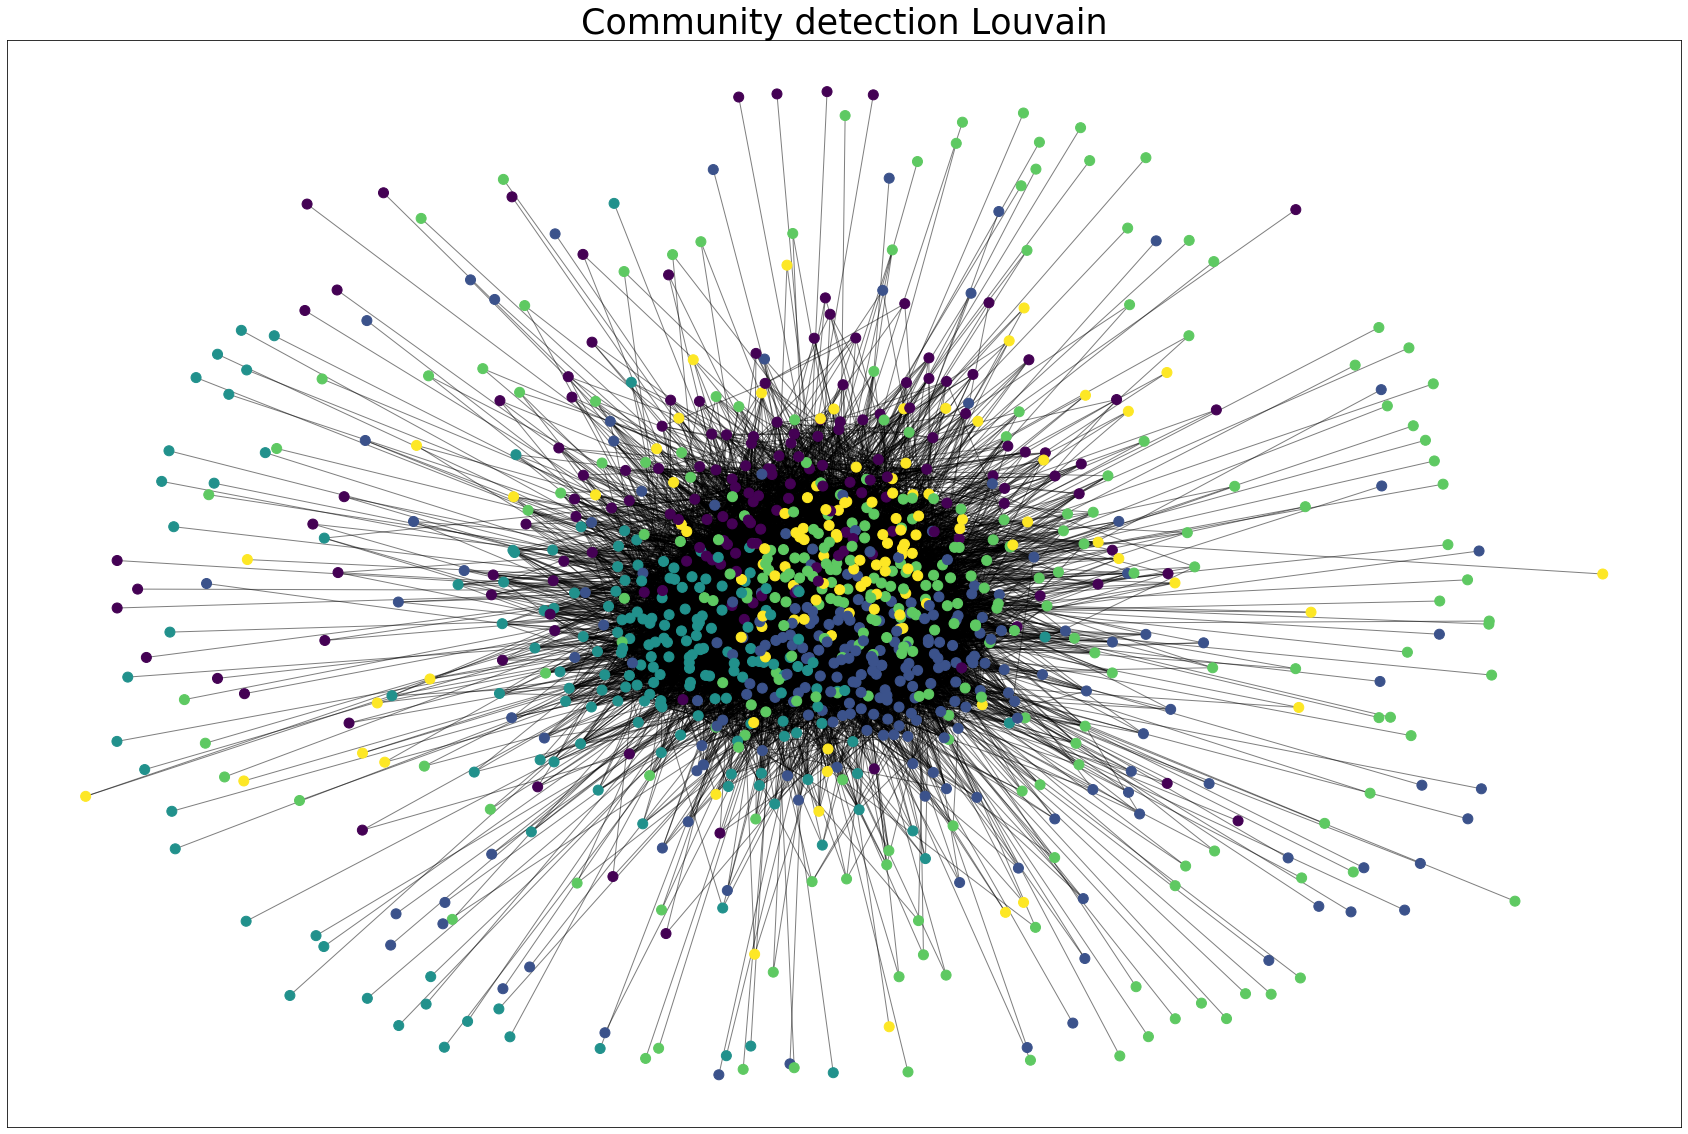

In [65]:
# visualization
plt.figure(figsize=(30,20))
pos = nx.spring_layout(G)
#cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community detection Louvain", fontdict = {'fontsize' : 35 })
plt.show()

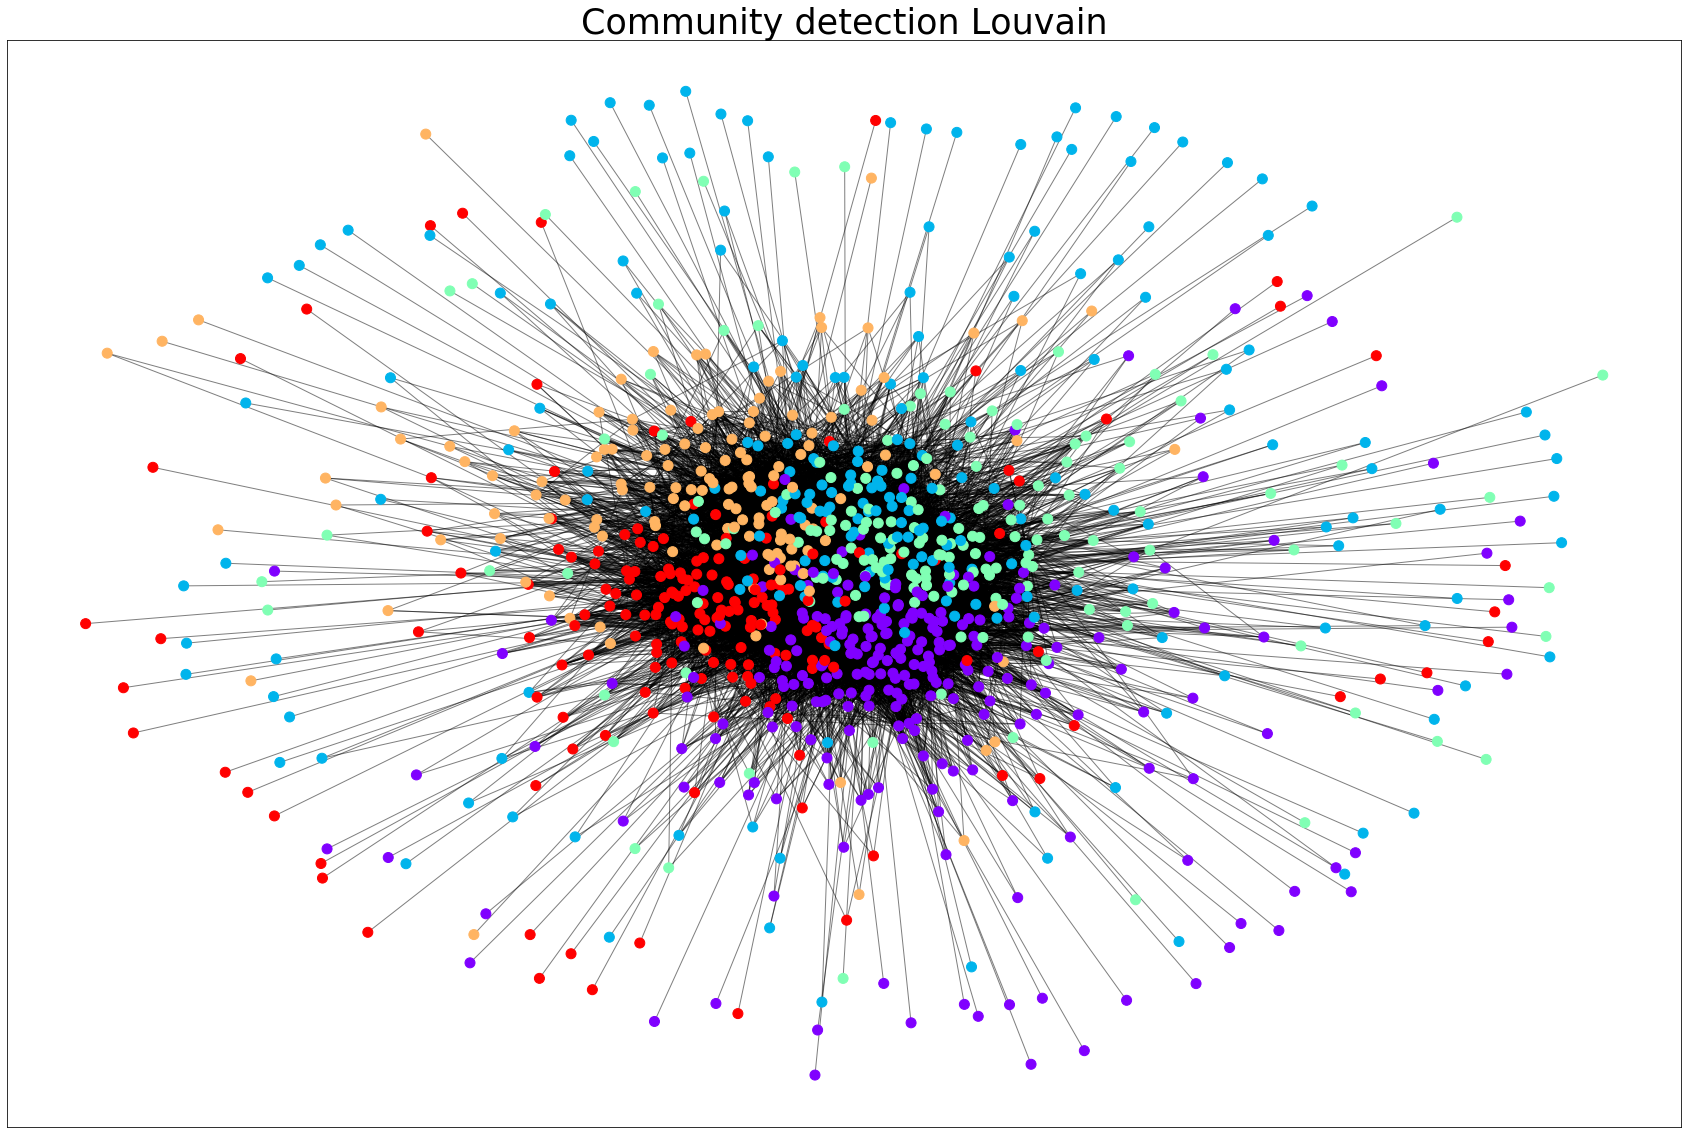

In [120]:
# visualization
plt.figure(figsize=(30,20))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap,node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community detection Louvain", fontdict = {'fontsize' : 35 })
plt.show()

In [92]:
G = nx.Graph()
G.add_nodes_from(hw['nodes'])
# add edge to the graph
G.add_edges_from(pairs)

In [93]:
G

In [94]:
import igraph as ig
import leidenalg as la
G = ig.Graph(pairs)
partition = la.find_partition(G ,la.ModularityVertexPartition)
print(partition)


Clustering with 1000 elements and 7 clusters
[0] 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 24, 26, 29, 30, 31, 33,
    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 50, 52, 53, 54, 55,
    56, 58, 59, 60, 62, 64, 65, 69, 70, 71, 72, 74, 75, 79, 83, 84, 85, 86,
    87, 88, 89, 91, 92, 93, 95, 96, 97, 99, 104, 108, 117, 118, 120, 121, 122,
    123, 125, 127, 128, 129, 134, 137, 139, 170, 173, 176, 178, 185, 201, 204,
    205, 213, 220, 231, 235, 243, 245, 247, 256, 264, 276, 279, 285, 290, 293,
    306, 313, 314, 319, 329, 335, 361, 371, 373, 376, 378, 387, 400, 408, 411,
    415, 418, 419, 422, 434, 436, 437, 438, 445, 455, 457, 461, 462, 464, 466,
    469, 472, 473, 474, 475, 476, 477, 479, 480, 481, 482, 483, 484, 485, 488,
    489, 490, 496, 498, 499, 500, 501, 507, 508, 509, 510, 512, 514, 516, 527,
    535, 537, 539, 547, 551, 560, 594, 595, 597, 598, 599, 602, 620, 621, 622,
    628, 662, 681, 720, 725, 737, 760, 766, 767, 787, 788, 794, 799, 832, 833,
    834, 840, 

In [95]:
type(partition)

leidenalg.VertexPartition.ModularityVertexPartition

Text(0.5, 1.0, 'Using leidenalg for community detection')

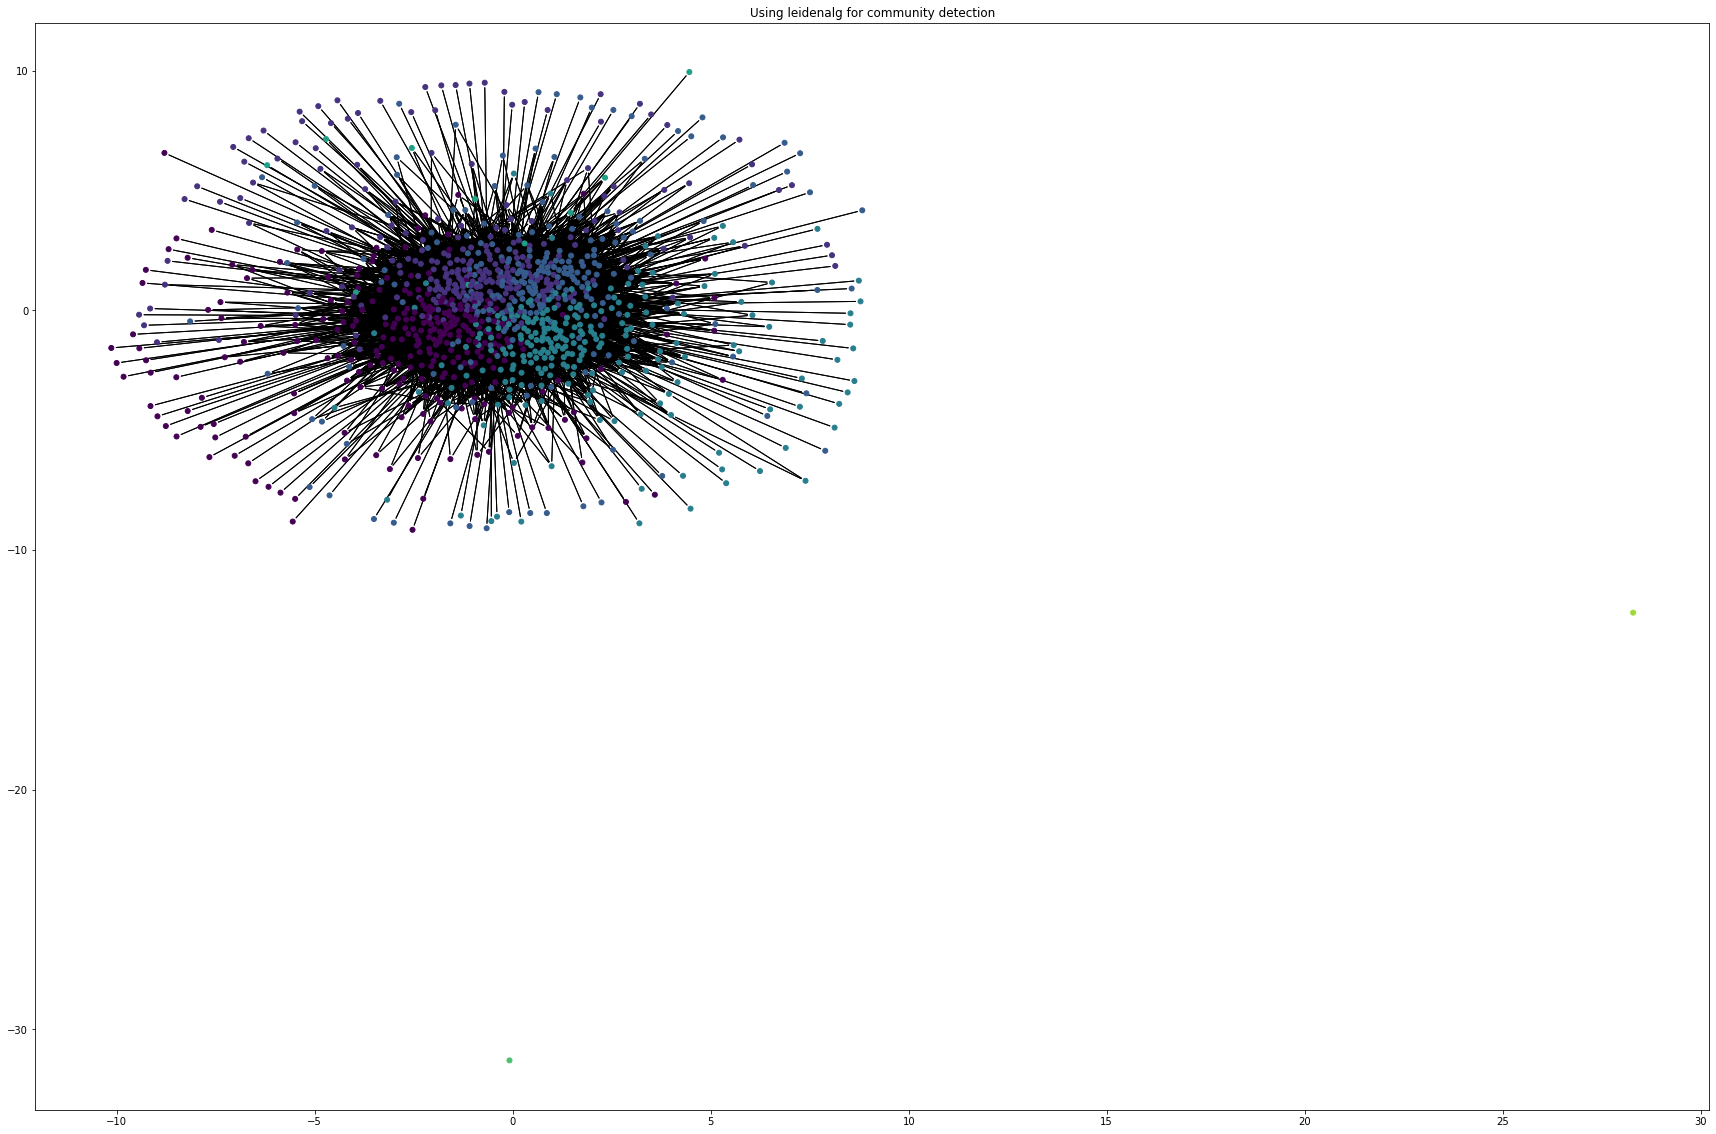

In [96]:
fig, ax = plt.subplots(figsize=(30, 20))
ig.plot(partition, target=ax)
plt.title("Using leidenalg for community detection")

In [104]:
hw2 = pd.read_csv("person_knows_person2.csv")
edges2 = [text.split("|") for text in hw2['Person.id|Person.id']]
pairs2 = [(int(edge[0]),int(edge[1])) for edge in edges2]
hw2['edges'] = pairs2
nodes2 = [int(pair[0]) for pair in hw2['edges']]
hw2['nodes'] = nodes2
G2 = nx.Graph()
G2.add_nodes_from(hw2['nodes'])
# add edge to the graph
G2.add_edges_from(pairs2)


In [105]:
import igraph as ig
import leidenalg as la
G2 = ig.Graph(pairs2)
partition = la.find_partition(G2 ,la.ModularityVertexPartition)
print(partition)

Clustering with 1000 elements and 5 clusters
[0] 1, 17, 19, 21, 25, 45, 56, 61, 68, 76, 82, 97, 103, 105, 106, 112, 115,
    116, 123, 136, 140, 148, 150, 155, 163, 175, 197, 207, 218, 224, 246, 249,
    253, 259, 263, 268, 269, 280, 299, 305, 317, 318, 346, 354, 382, 384, 392,
    428, 433, 439, 440, 441, 442, 444, 446, 449, 452, 459, 466, 468, 478, 486,
    497, 511, 519, 520, 541, 542, 544, 545, 547, 548, 550, 553, 555, 556, 557,
    562, 565, 567, 568, 569, 570, 571, 572, 574, 575, 576, 578, 581, 582, 583,
    584, 586, 587, 588, 589, 590, 592, 593, 596, 601, 603, 606, 609, 610, 611,
    612, 614, 615, 616, 617, 618, 625, 626, 627, 629, 630, 631, 633, 635, 636,
    637, 638, 640, 643, 644, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656,
    657, 658, 660, 661, 662, 663, 664, 668, 669, 670, 672, 673, 674, 675, 676,
    678, 679, 680, 682, 683, 685, 686, 687, 692, 693, 694, 695, 696, 697, 698,
    699, 700, 701, 702, 703, 704, 706, 708, 711, 713, 715, 716, 717, 719, 721,
    722, 7

In [112]:
for i in range(0,5):
    print("cluster " + str(i) + ": " + str( len(partition[i])) + " Nodes" )

cluster 0: 243 Nodes
cluster 1: 234 Nodes
cluster 2: 228 Nodes
cluster 3: 153 Nodes
cluster 4: 142 Nodes


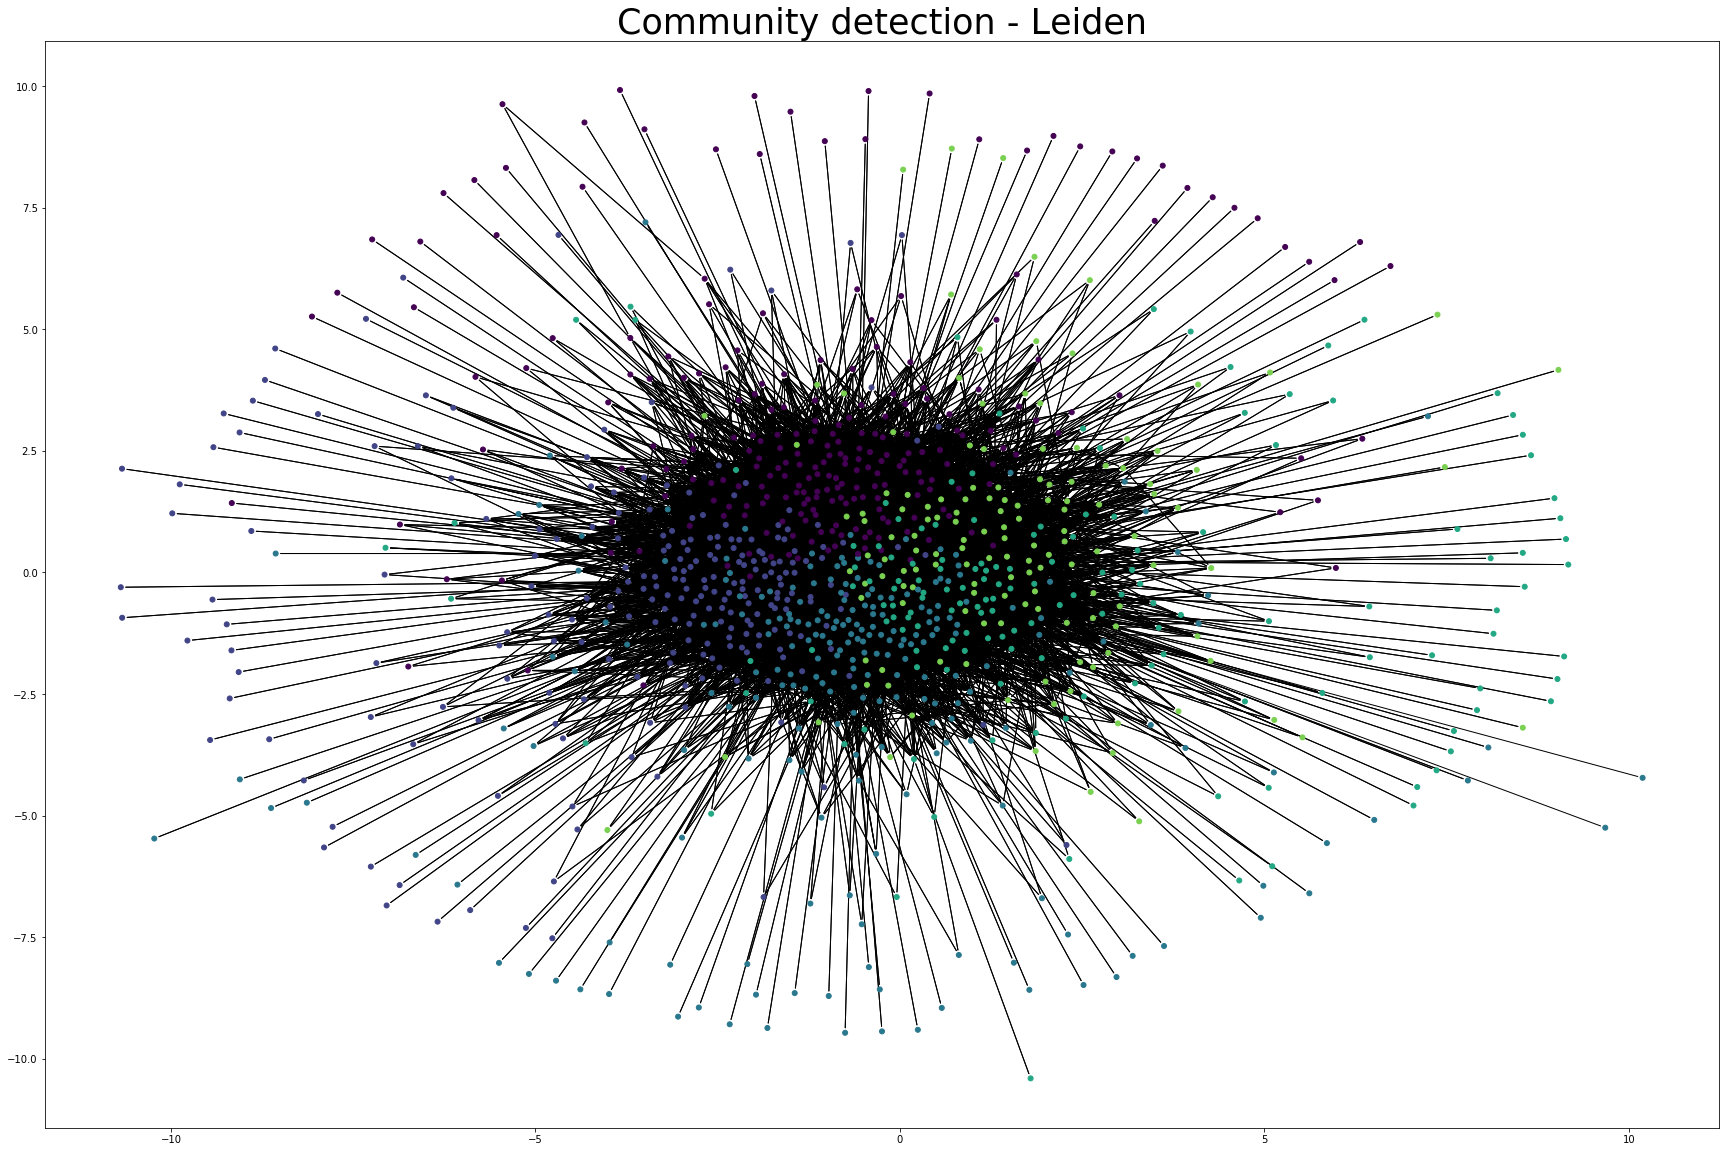

In [113]:
fig, ax = plt.subplots(figsize=(30, 20))
plt.title("Community detection - Leiden", fontdict = {'fontsize' : 35 })
ig.plot(partition, target=ax)